In [8]:
import pickle
import analyzer
from analyzer.datasets import SampleManager

In [14]:
from analyzer.core import AnalysisResult

In [5]:
data = pickle.load(open("myoutput.pkl", "rb"))

In [9]:
s = SampleManager()

In [12]:
s.loadSamplesFromDirectory("datasets/")

In [13]:
s

SampleManager(sets={'TTToHadronic2018': TTToHadronic2018, 'DataSingleMuon2016': DataSingleMuon2016, 'Skim_QCDInclusive2018_HT300to500': Skim_QCDInclusive2018_HT300to500, 'Skim_QCDInclusive2018_HT500to700': Skim_QCDInclusive2018_HT500to700, 'Skim_QCDInclusive2018_HT700to1000': Skim_QCDInclusive2018_HT700to1000, 'Skim_QCDInclusive2018_HT1000to1500': Skim_QCDInclusive2018_HT1000to1500, 'Skim_QCDInclusive2018_HT1500to2000': Skim_QCDInclusive2018_HT1500to2000, 'Skim_QCDInclusive2018_HT2000toInf': Skim_QCDInclusive2018_HT2000toInf, 'Skim_WJetsToQQ2018_HT-200To400': Skim_WJetsToQQ2018_HT-200To400, 'Skim_WJetsToQQ2018_HT-400To600': Skim_WJetsToQQ2018_HT-400To600, 'Skim_WJetsToQQ2018_HT-600To800': Skim_WJetsToQQ2018_HT-600To800, 'Skim_WJetsToQQ2018_HT-800ToInf': Skim_WJetsToQQ2018_HT-800ToInf, 'Skim_ZJetsToQQ2018_HT-200To400': Skim_ZJetsToQQ2018_HT-200To400, 'Skim_ZJetsToQQ2018_HT-400To600': Skim_ZJetsToQQ2018_HT-400To600, 'Skim_ZJetsToQQ2018_HT-600To800': Skim_ZJetsToQQ2018_HT-600To800, 'Skim_

In [16]:
a = AnalysisResult.fromFile("myoutput.pkl")

m13_pt could be a NN parameter lol i'm never gonna look at this again

In [18]:
hists = a.getMergedHistograms(s)

In [19]:
from hist import Hist

In [20]:
hists["m13_m"]

Hist(Regular(60, 0, 3000, name='$m_{3}$'), storage=Weight()) # Sum: WeightedSum(value=1534, variance=669.653)

In [24]:
from analyzer.plotting import PlotObject, drawAs1DHist
import matplotlib.pyplot as plt

In [23]:
m13_m_hist_plotobj = PlotObject.fromHist(hists["m13_m"])

<Axes: >

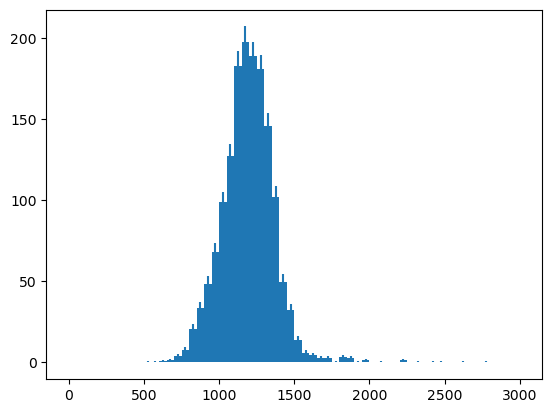

In [26]:
fig, ax = plt.subplots()
drawAs1DHist(ax, m13_m_hist_plotobj)

In [27]:
from analyzer.plotting import loadStyles
loadStyles()

<Axes: >

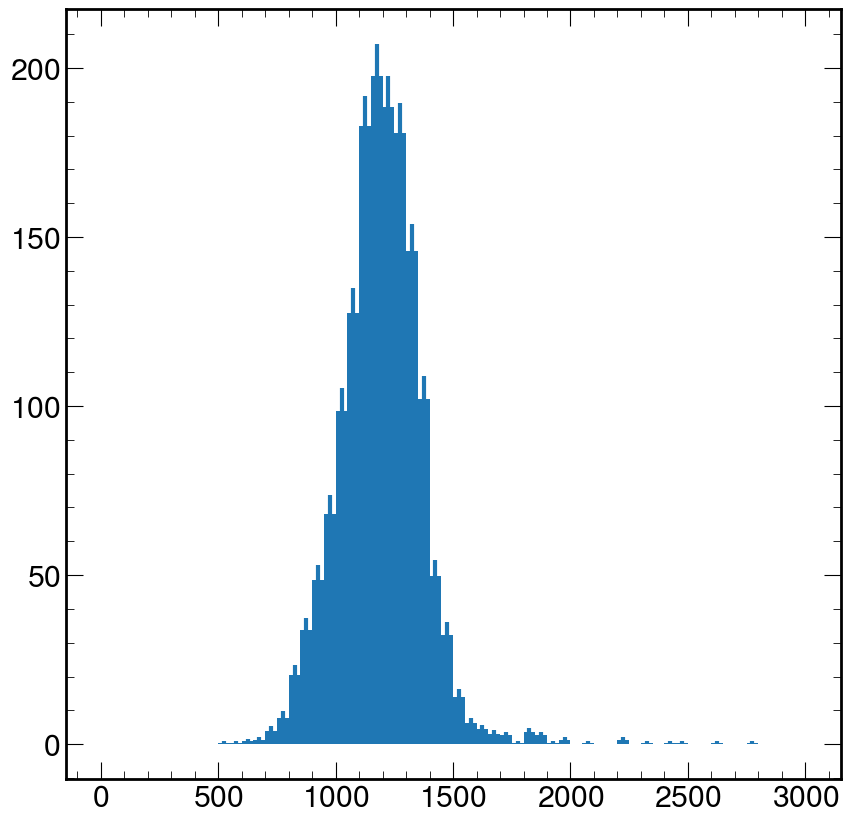

In [28]:
fig, ax = plt.subplots()
drawAs1DHist(ax, m13_m_hist_plotobj)